In [38]:
import math
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt # pyplot - обертка matplotlib для интерактивного графопостроения.
print('matplotlib found, version is ', mpl.__version__)

import scipy
print('scipy found, version is ', scipy.__version__)

import os


def read(file):
    a = ''
    data = []
    angles = []
    k = 0
    for line in file:
        data.append([])
        angles.append([])
        for i in range(len(line)):
            if line[i] != ',' and line[i] != '\n':
                a += line[i]
            elif line[i] == ',':
                data[k].append(float(a)) 
                a = ''
            elif line[i] == '\n':
                angles[k].append(float(a))
                a = ''
        k += 1
    data = np.array(data)
    angles = np.array(angles)
    return (data, angles)

def read_dir(name):
    dir = os.listdir("data/" + name)
    data = []
    angles = []
    k = 0
    for element in dir:
        if k == 0:
            file = open("data/" + name + "/"  + element)
            (data, angles) = read(file)
        else:
            file = open("data/" + name + "/"  + element)
            (data1, angles1) = read(file)
            data = np.concatenate((data, data1), axis = 0)
            angles = np.concatenate((angles, angles1), axis = 0)
        k += 1
    return data, angles



def Mercator(data):
    #data[0] = [east, north]
    start_latitude = data[0][1] #the latitude we start from
    phi = start_latitude*np.pi/180.0
    R_equator = 6378137.0
    s = np.cos(phi)
    R = R_equator * 1 * (0.99832407 + 0.00167644 * np.cos(2 * phi) - 0.00000352*np.cos(4 * phi))
    
    x_meters = s * R * np.pi * data[:,0] / 180.0
    y_meters = s * R * np.log(np.tan(np.pi * (90.0 + data[:,1]) / 360.0))
    return [x_meters, y_meters]


def least_squares_method(data_arr):
    x = np.array([el[0] for el in data_arr])
    y = np.array([el[1] for el in data_arr])

    x_m = np.mean(x)
    y_m = np.mean(y)

    u = x - x_m
    v = y - y_m

    Suv  = sum(u * v)
    Suu  = sum(u ** 2)
    Svv  = sum(v ** 2)
    Suuv = sum(u ** 2 * v)
    Suvv = sum(u * v ** 2)
    Suuu = sum(u ** 3)
    Svvv = sum(v ** 3)

    A = np.array([ [ Suu, Suv ], [Suv, Svv]])
    B = np.array([ Suuu + Suvv, Svvv + Suuv ])/2.0
    uc, vc = np.linalg.solve(A, B)
    xc_1 = x_m + uc
    yc_1 = y_m + vc

    Ri_1 = np.sqrt((x - xc_1) ** 2 + (y - yc_1) ** 2)
    R_1 = np.mean(Ri_1)
    return xc_1, yc_1, R_1

def alpha(R, f):
    R = (R ** 2 + 1.5 ** 2) ** 0.5
    result = math.atan(2.63 / R)
    if f < 0:
        result *= -1
    return result

matplotlib found, version is  2.0.0
scipy found, version is  0.18.1


<IPython.core.display.Javascript object>


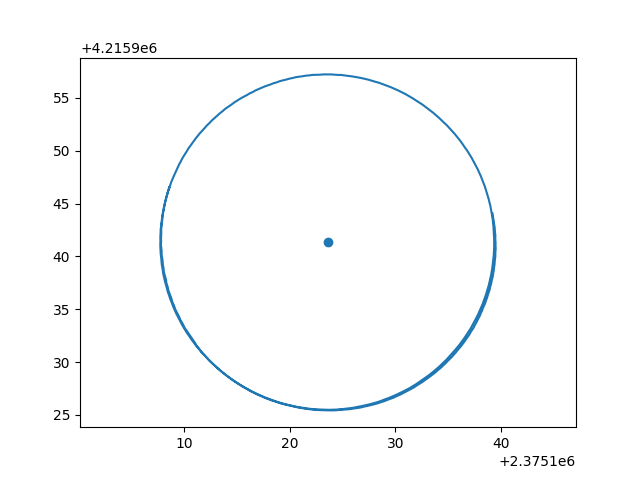

2375123.62011
4215941.32625
15.8435018576


In [40]:
%matplotlib notebook 
dir = os.listdir("data/")

data, angles0 = read_dir(dir[0])
data_m = np.array(Mercator(data)).T
data_m = data_m[:500]
plt.plot(data_m[:, 0], data_m[:, 1])
plt.scatter(least_squares_method(data_m)[0], least_squares_method(data_m)[1])
plt.axis('equal')
plt.show()

print(least_squares_method(data_m)[0])
print(least_squares_method(data_m)[1])
print(least_squares_method(data_m)[2])

graph = []

M = np.array([el[0] for el in angles0[:500]])
delta = np.mean(M)
alp = alpha(least_squares_method(data_m)[2], delta)
graph.append([])
graph[0].append(delta)
graph[0].append(alp)

<IPython.core.display.Javascript object>


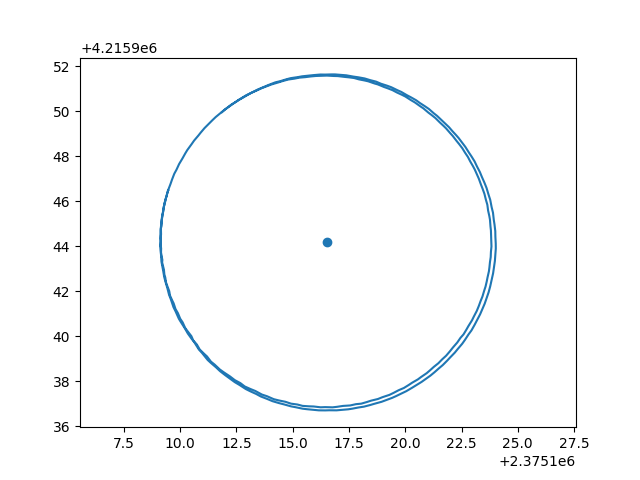

2375116.51637
4215944.1858
7.40346376078


In [41]:
%matplotlib notebook 
dir = os.listdir("data/")
data, angles1 = read_dir(dir[1])
data_m = np.array(Mercator(data)).T
data_m = data_m[:400]
plt.scatter(least_squares_method(data_m)[0], least_squares_method(data_m)[1])
plt.plot(data_m[:, 0], data_m[:, 1])
plt.axis('equal')
plt.show()

print(least_squares_method(data_m)[0])
print(least_squares_method(data_m)[1])
print(least_squares_method(data_m)[2])

M = np.array([el[0] for el in angles1[:400]])
delta = np.mean(M)
alp = alpha(least_squares_method(data_m)[2], delta)
graph.append([])
graph[1].append(delta)
graph[1].append(alp)

<IPython.core.display.Javascript object>


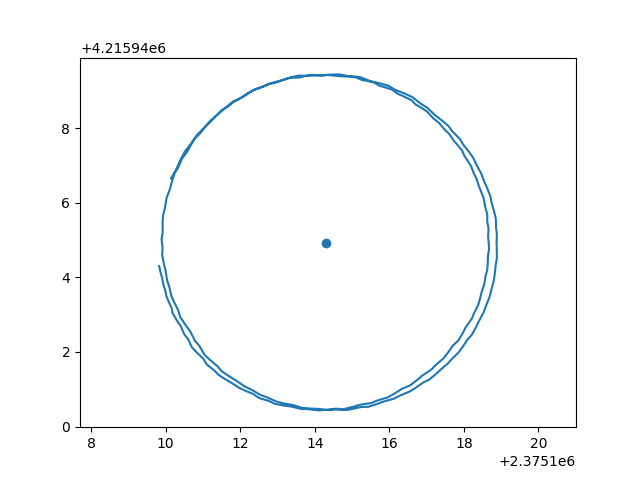

2375114.31027
4215944.93162
4.48212007676


In [42]:
%matplotlib notebook 
dir = os.listdir("data/")
data, angles2 = read_dir(dir[2])
data_m = np.array(Mercator(data)).T
data_m = data_m[50:300]
plt.plot(data_m[:, 0], data_m[:, 1])
plt.scatter(least_squares_method(data_m)[0], least_squares_method(data_m)[1])


plt.axis('equal')
plt.show()

print(least_squares_method(data_m)[0])
print(least_squares_method(data_m)[1])
print(least_squares_method(data_m)[2])


M = np.array([el[0] for el in angles2[50:300]])
delta = np.mean(M)
alp = alpha(least_squares_method(data_m)[2], delta)
graph.append([])
graph[2].append(delta)
graph[2].append(alp)

<IPython.core.display.Javascript object>


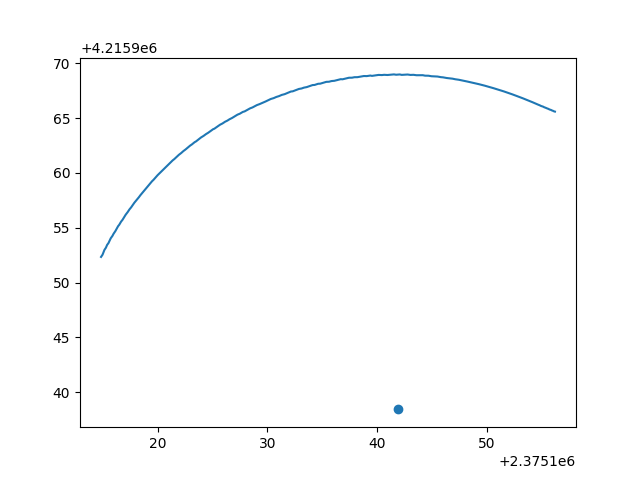

2375141.91688
4215938.50065
30.5159563529


In [43]:
%matplotlib notebook 
dir = os.listdir("data/")
data, angles3 = read_dir(dir[3])
data_m = np.array(Mercator(data)).T
data_m = data_m[300:500]
plt.plot(data_m[:, 0], data_m[:, 1])
plt.scatter(least_squares_method(data_m)[0], least_squares_method(data_m)[1])
plt.axis('equal')
plt.show()

print(least_squares_method(data_m)[0])
print(least_squares_method(data_m)[1])
print(least_squares_method(data_m)[2])

M = np.array([el[0] for el in angles3[300:500]])
delta = np.mean(M)
alp = alpha(least_squares_method(data_m)[2], delta)
graph.append([])
graph[3].append(delta)
graph[3].append(alp)

<IPython.core.display.Javascript object>


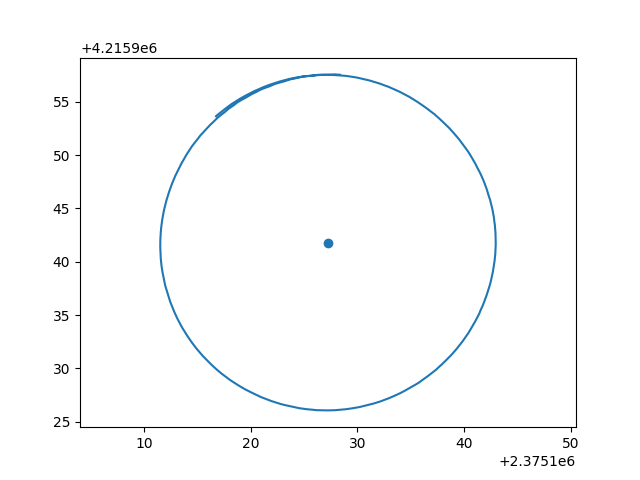

2375127.19947
4215941.77934
15.7217310538


In [44]:
%matplotlib notebook 
dir = os.listdir("data/")
data, angles4 = read_dir(dir[4])
data_m = np.array(Mercator(data)).T
data_m = data_m[400:700]
plt.plot(data_m[:, 0], data_m[:, 1])
plt.axis('equal')
plt.scatter(least_squares_method(data_m)[0], least_squares_method(data_m)[1])
plt.show()

print(least_squares_method(data_m)[0])
print(least_squares_method(data_m)[1])
print(least_squares_method(data_m)[2])

M = np.array([el[0] for el in angles4[400:700]])
delta = np.mean(M)
alp = alpha(least_squares_method(data_m)[2], delta)
graph.append([])
graph[4].append(delta)
graph[4].append(alp)

<IPython.core.display.Javascript object>


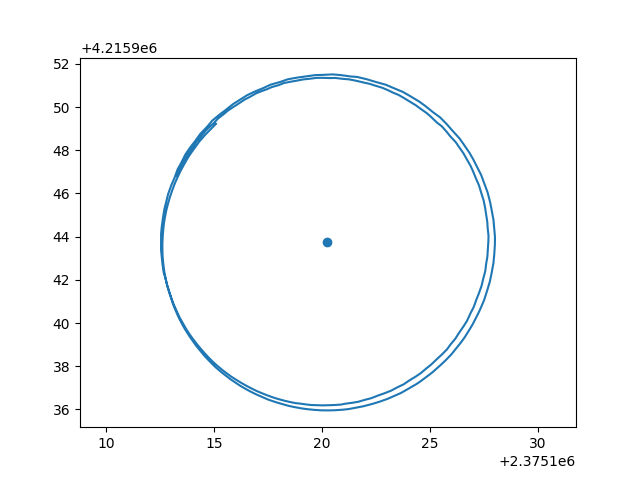

2375120.21619
4215943.74046
7.64609426197


In [45]:
%matplotlib notebook 
dir = os.listdir("data/")
data, angles5 = read_dir(dir[5])
data_m = np.array(Mercator(data)).T
data_m = data_m[200:500]
plt.plot(data_m[:, 0], data_m[:, 1])
plt.axis('equal')
plt.scatter(least_squares_method(data_m)[0], least_squares_method(data_m)[1])
plt.show()

print(least_squares_method(data_m)[0])
print(least_squares_method(data_m)[1])
print(least_squares_method(data_m)[2])

M = np.array([el[0] for el in angles5[200:500]])
delta = np.mean(M)
alp = alpha(least_squares_method(data_m)[2], delta)
graph.append([])
graph[5].append(delta)
graph[5].append(alp)

<IPython.core.display.Javascript object>


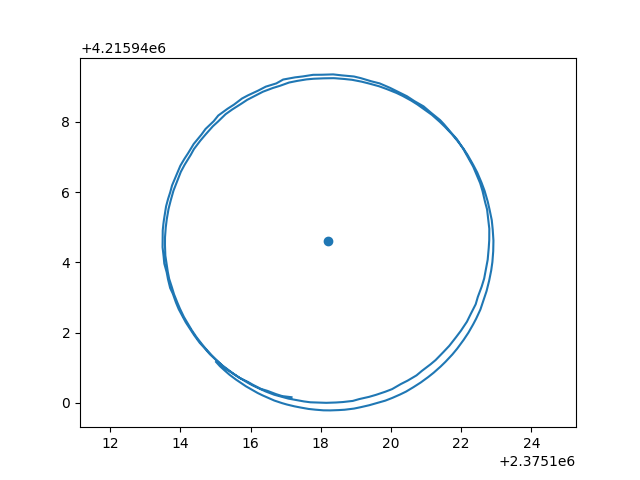

2375118.20704
4215944.59836
4.6771316895


In [46]:
%matplotlib notebook 
dir = os.listdir("data/")
data, angles6 = read_dir(dir[6])
data_m = np.array(Mercator(data)).T
data_m = data_m[250:500]
plt.plot(data_m[:, 0], data_m[:, 1])
plt.axis('equal')
plt.scatter(least_squares_method(data_m)[0], least_squares_method(data_m)[1])
plt.show()

print(least_squares_method(data_m)[0])
print(least_squares_method(data_m)[1])
print(least_squares_method(data_m)[2])


M = np.array([el[0] for el in angles6[250:500]])
delta = np.mean(M)
alp = alpha(least_squares_method(data_m)[2], delta)
graph.append([])
graph[6].append(delta)
graph[6].append(alp)

<IPython.core.display.Javascript object>


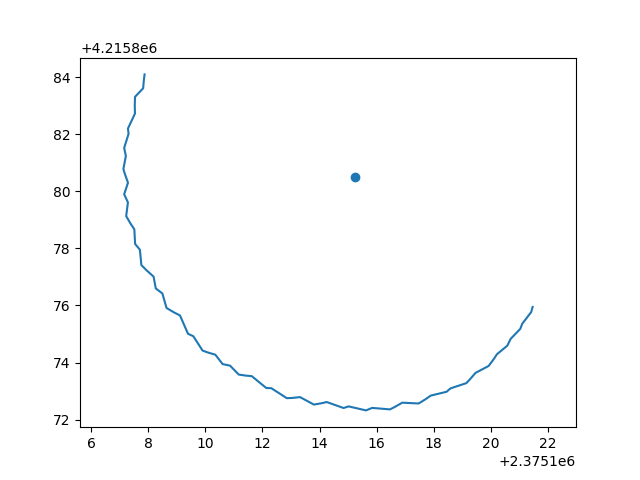

2375115.23423
4215880.51863
8.04092401419


In [47]:
%matplotlib notebook 
dir = os.listdir("data/")
data, angles7 = read_dir(dir[7])
data_m = np.array(Mercator(data)).T
data_m = data_m[230:300]
plt.plot(data_m[:, 0], data_m[:, 1])
plt.axis('equal')
plt.scatter(least_squares_method(data_m)[0], least_squares_method(data_m)[1])
plt.show()

print(least_squares_method(data_m)[0])
print(least_squares_method(data_m)[1])
print(least_squares_method(data_m)[2])

M = np.array([el[0] for el in angles7[230:300]])
delta = np.mean(M)
alp = alpha(least_squares_method(data_m)[2], delta)
graph.append([])
graph[7].append(delta)
graph[7].append(alp)

<IPython.core.display.Javascript object>


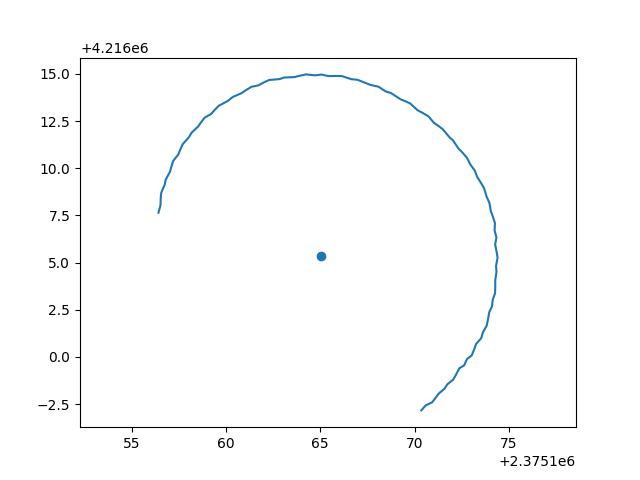

2375165.0345
4216005.33344
9.43735189018


In [48]:
%matplotlib notebook 
dir = os.listdir("data/")
data, angles8 = read_dir(dir[8])
data_m = np.array(Mercator(data)).T
data_m = data_m[220:320]
plt.plot(data_m[:, 0], data_m[:, 1])
plt.axis('equal')
plt.scatter(least_squares_method(data_m)[0], least_squares_method(data_m)[1])
plt.show()

print(least_squares_method(data_m)[0])
print(least_squares_method(data_m)[1])
print(least_squares_method(data_m)[2])

M = np.array([el[0] for el in angles8[220:320]])
delta = np.mean(M)
alp = alpha(least_squares_method(data_m)[2], delta)
graph.append([])
graph[8].append(delta)
graph[8].append(alp)

<IPython.core.display.Javascript object>


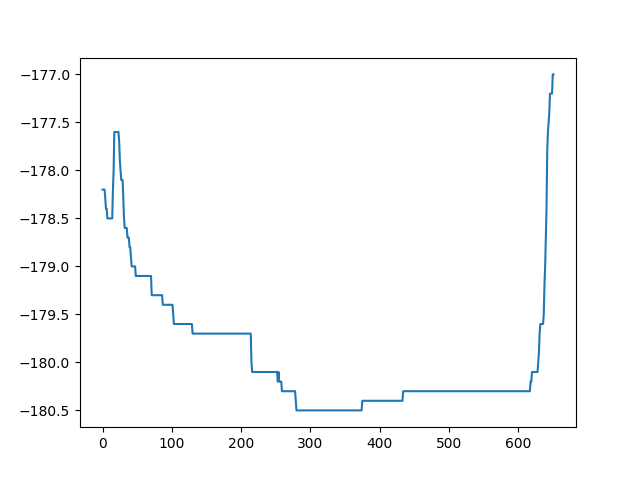

In [49]:
%matplotlib notebook 
plt.plot(angles0)
plt.show()

<IPython.core.display.Javascript object>


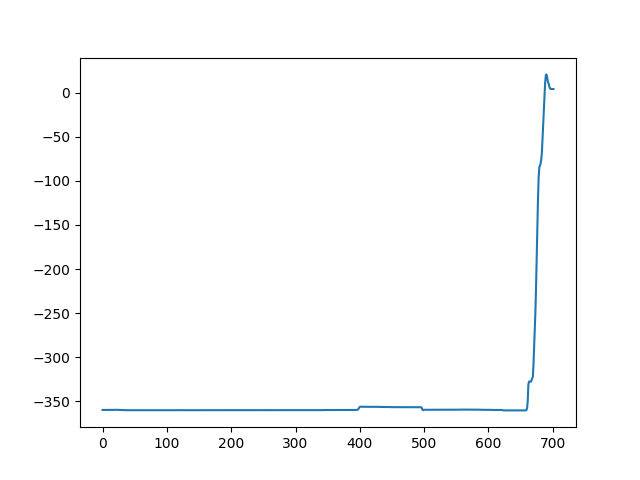

In [50]:
%matplotlib notebook 
plt.plot(angles1)
plt.show()

<IPython.core.display.Javascript object>


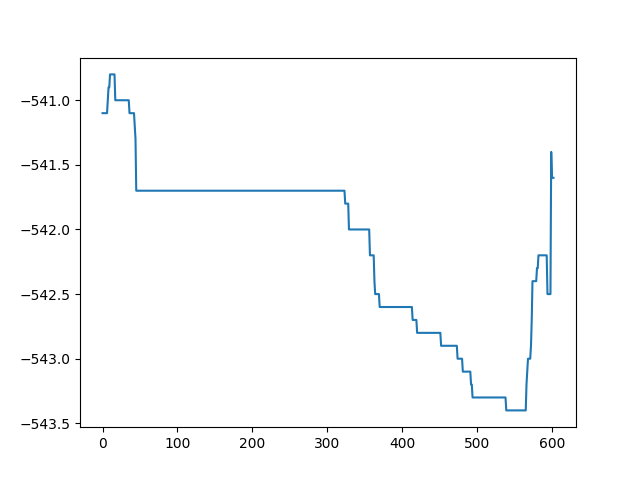

In [51]:
%matplotlib notebook 
plt.plot(angles2)
plt.show()

<IPython.core.display.Javascript object>


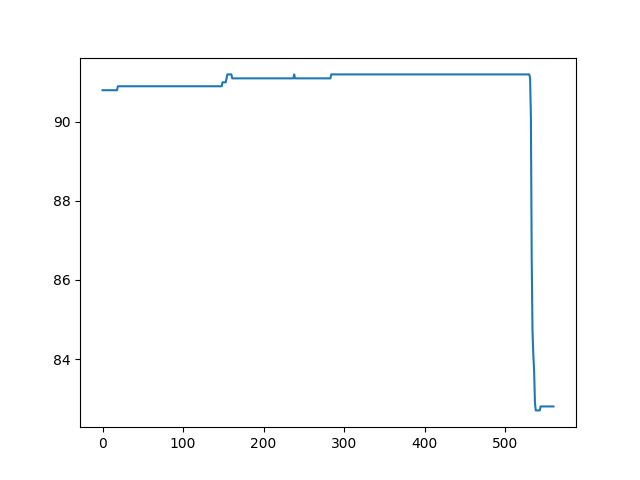

In [52]:
%matplotlib notebook 
plt.plot(angles3)
plt.show()

<IPython.core.display.Javascript object>


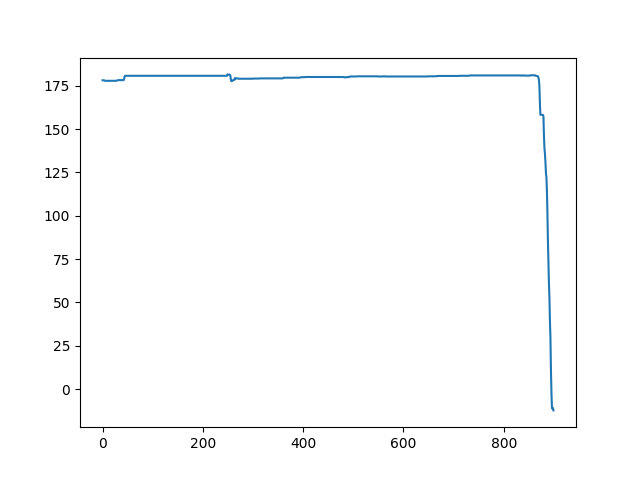

In [53]:
%matplotlib notebook 
plt.plot(angles4)
plt.show()

<IPython.core.display.Javascript object>


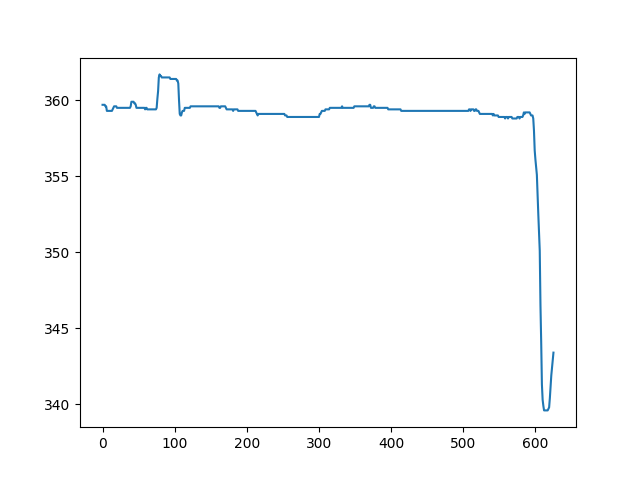

In [54]:
%matplotlib notebook 
plt.plot(angles5)
plt.show()

<IPython.core.display.Javascript object>


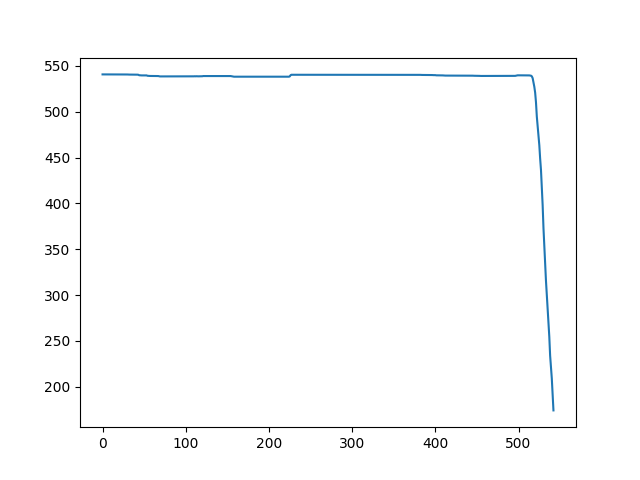

In [55]:
%matplotlib notebook 
plt.plot(angles6)
plt.show()

<IPython.core.display.Javascript object>


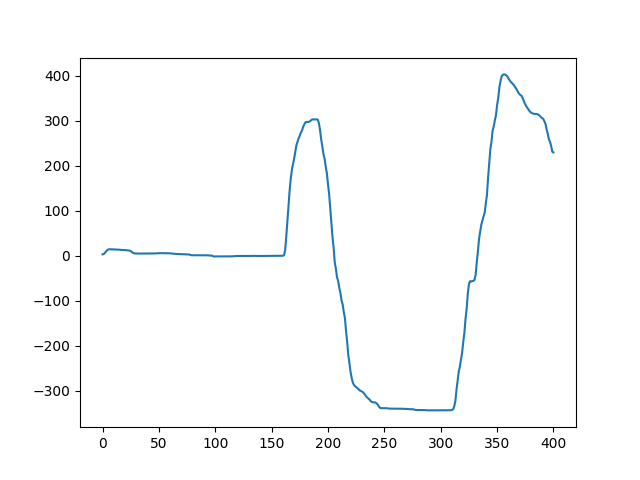

In [56]:
%matplotlib notebook 
plt.plot(angles7)
plt.show()

<IPython.core.display.Javascript object>


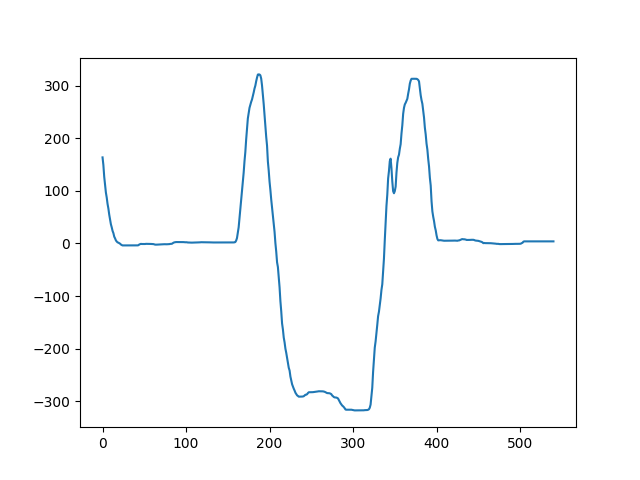

In [57]:
%matplotlib notebook 
plt.plot(angles8)
plt.show()

<IPython.core.display.Javascript object>


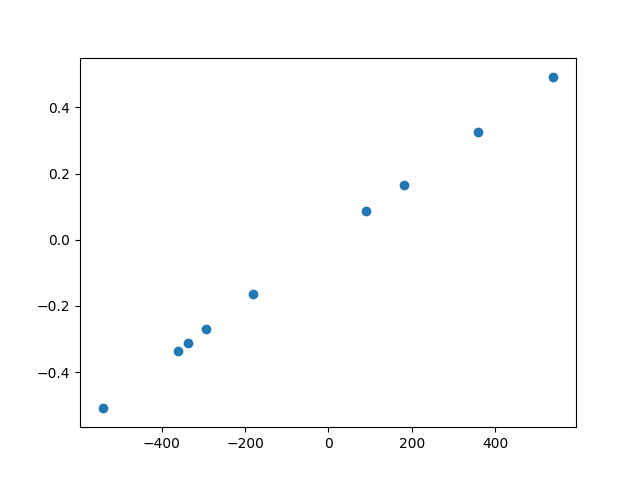

[[ -1.79890800e+02  -1.63779377e-01]
 [ -3.59953000e+02  -3.35039069e-01]
 [ -5.41700000e+02  -5.07775715e-01]
 [  9.12000000e+01   8.58688157e-02]
 [  1.80256000e+02   1.65013898e-01]
 [  3.59280000e+02   3.25525152e-01]
 [  5.39825200e+02   4.91601997e-01]
 [ -3.36032857e+02  -3.11090360e-01]
 [ -2.92620000e+02  -2.68575444e-01]]


In [63]:
%matplotlib notebook 
graph = np.array(graph)
plt.scatter(graph[:, 0], graph[:, 1])
plt.show()
print(graph)

In [64]:
graph1 = []
for i in range (len(graph)):
    if (i < 2):
        graph1.append([])
        for j in range (len(graph[i])):
            graph1[i].append(graph[i][j])
    elif (i > 2):
        graph1.append([])
        for j in range (len(graph[i])):
            graph1[i - 1].append(graph[i][j])
graph1 = np.array(graph)
print (graph1)
print (graph)

[[ -1.79890800e+02  -1.63779377e-01]
 [ -3.59953000e+02  -3.35039069e-01]
 [ -5.41700000e+02  -5.07775715e-01]
 [  9.12000000e+01   8.58688157e-02]
 [  1.80256000e+02   1.65013898e-01]
 [  3.59280000e+02   3.25525152e-01]
 [  5.39825200e+02   4.91601997e-01]
 [ -3.36032857e+02  -3.11090360e-01]
 [ -2.92620000e+02  -2.68575444e-01]]
[[ -1.79890800e+02  -1.63779377e-01]
 [ -3.59953000e+02  -3.35039069e-01]
 [ -5.41700000e+02  -5.07775715e-01]
 [  9.12000000e+01   8.58688157e-02]
 [  1.80256000e+02   1.65013898e-01]
 [  3.59280000e+02   3.25525152e-01]
 [  5.39825200e+02   4.91601997e-01]
 [ -3.36032857e+02  -3.11090360e-01]
 [ -2.92620000e+02  -2.68575444e-01]]


<IPython.core.display.Javascript object>


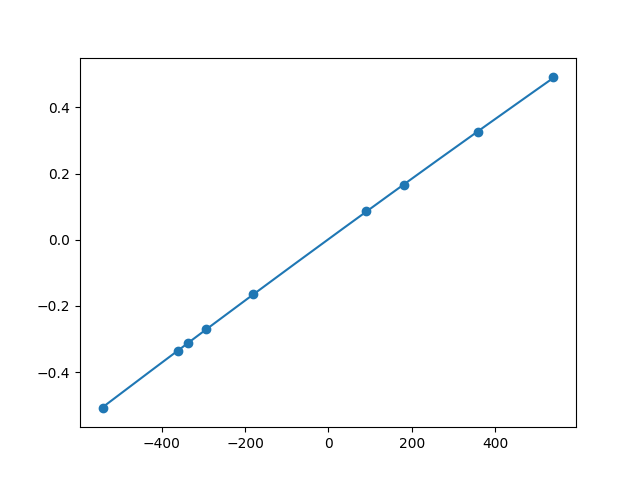

[ -3.16459061e-08   9.20872190e-04   1.55301331e-03]


In [68]:
%matplotlib notebook 
graph = np.array(graph)
plt.scatter(graph1[:, 0], graph1[:, 1])

x = np.array([el[0] for el in graph1])
y = np.array([el[1] for el in graph1])
x = np.sort(x)
y = np.sort(y)
c = np.polyfit(x, y, 2)
x_ = np.arange(-540, 540, 1)
y_ = x_**2 * c[0] + x_ * c[1] + c[2]
plt.plot(x_, y_)
plt.show()
print (c)

<IPython.core.display.Javascript object>


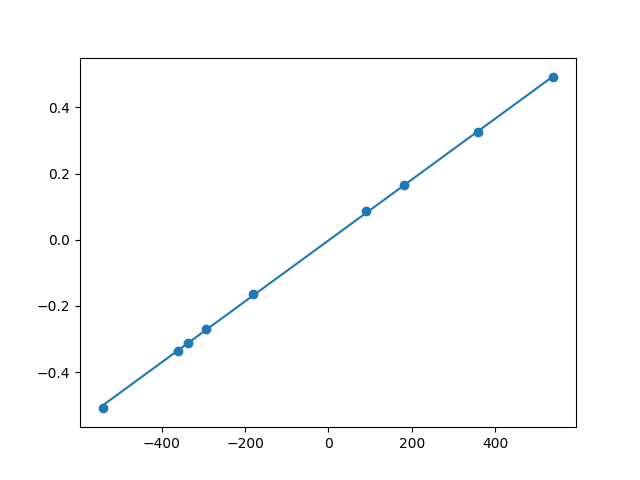

[ 0.00092079 -0.00237314]


In [71]:
%matplotlib notebook 
graph = np.array(graph)
plt.scatter(graph1[:, 0], graph1[:, 1])

x = np.array([el[0] for el in graph1])
y = np.array([el[1] for el in graph1])
x = np.sort(x)
y = np.sort(y)
c = np.polyfit(x, y, 1)
x_ = np.arange(-540, 540, 1)
y_ = x_ * c[0] + c[1]
plt.plot(x_, y_)
plt.show()

print (c)

<IPython.core.display.Javascript object>


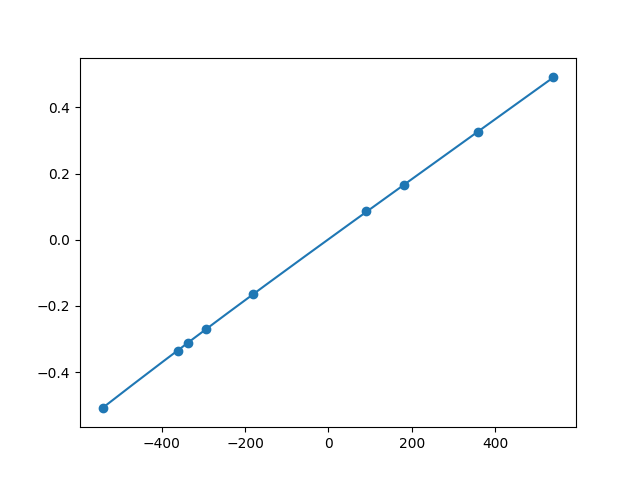

[  3.62909353e-11  -3.16858236e-08   9.13402447e-04   1.36859785e-03]


In [70]:
%matplotlib notebook 
graph = np.array(graph)
plt.scatter(graph1[:, 0], graph1[:, 1])

x = np.array([el[0] for el in graph1])
y = np.array([el[1] for el in graph1])
x = np.sort(x)
y = np.sort(y)
c = np.polyfit(x, y, 3)
x_ = np.arange(-540, 540, 1)
y_ = x_**3 * c[0] + x_**2 * c[1] + x_ * c[2] + c[3]
plt.plot(x_, y_)
plt.show()

print(c)